## Observations and Insights 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
mouse_study_df = pd.merge(mouse_metadata, study_results, how='outer', on='Mouse ID')
mouse_study_df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
# Checking the number of mice.
mouse_study_df['Mouse ID'].value_counts()


g989    13
k403    10
j365    10
j984    10
k210    10
        ..
v199     1
t573     1
f932     1
b447     1
u153     1
Name: Mouse ID, Length: 249, dtype: int64

In [4]:
mouse_study_df.count()


Mouse ID              1893
Drug Regimen          1893
Sex                   1893
Age_months            1893
Weight (g)            1893
Timepoint             1893
Tumor Volume (mm3)    1893
Metastatic Sites      1893
dtype: int64

In [5]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse = mouse_study_df.loc[mouse_study_df.duplicated(subset=["Mouse ID", "Timepoint",]),"Mouse ID"].unique()

duplicate_mouse


array(['g989'], dtype=object)

In [6]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse = mouse_study_df.loc[(mouse_study_df['Mouse ID'] == 'g989')] 

duplicate_mouse


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_study_df = mouse_study_df.loc[(mouse_study_df['Mouse ID'] != 'g989')] 
cleaned_study_df 


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [8]:
# Checking the number of mice in the clean DataFrame.
cleaned_study_df['Mouse ID'].value_counts()


k403    10
o287    10
j984    10
k210    10
k382    10
        ..
h428     1
o848     1
t573     1
d133     1
x226     1
Name: Mouse ID, Length: 248, dtype: int64

## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

regimens_df = cleaned_study_df.groupby("Drug Regimen")
tumor_mean = round(regimens_df['Tumor Volume (mm3)'].mean(), 2)
tumor_median = round(regimens_df['Tumor Volume (mm3)'].median(), 2)
tumor_variance = round(regimens_df['Tumor Volume (mm3)'].var(),2)
tumor_std = round(regimens_df['Tumor Volume (mm3)'].std(), 2)
tumor_sem = round(regimens_df['Tumor Volume (mm3)'].sem(ddof=0), 4)

summary_stat_1 = {"Mean": tumor_mean,
                "Median": tumor_median,
                "Variance": tumor_variance,
                "Std Deviation": tumor_std,
                "SEM": tumor_sem}

summary_stat_1_df = pd.DataFrame(summary_stat_1)
summary_stat_1_df.columns=pd.MultiIndex.from_product([['Tumor Volume Summary Stats'],summary_stat_1_df.columns])
summary_stat_1_df


Tumor Volume Summary Stats                                      
                                   Mean Median Variance Std Deviation     SEM
Drug Regimen                                                                 
Capomulin                         40.68  41.56    24.95          4.99  0.3286
Ceftamin                          52.59  51.78    39.29          6.27  0.4685
Infubinol                         52.88  51.82    43.13          6.57  0.4909
Ketapril                          55.24  53.70    68.55          8.28  0.6023
Naftisol                          54.33  52.51    66.17          8.13  0.5949
Placebo                           54.03  52.29    61.17          7.82  0.5797
Propriva                          52.32  50.45    43.85          6.62  0.5425
Ramicane                          40.22  40.67    23.49          4.85  0.3202
Stelasyn                          54.23  52.43    59.45          7.71  0.5715
Zoniferol                         53.24  51.82    48.53          6.97  0.5150

In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen
summary_stat_2_df = cleaned_study_df.groupby(cleaned_study_df["Drug Regimen"])['Tumor Volume (mm3)'].agg(["mean", 
                                               "median", 
                                               "var", 
                                               "std", 
                                               "sem"])



# Clean Dataframe
summary_stat_2_df["mean"] = summary_stat_2_df["mean"].map("{:,.2f}".format)
summary_stat_2_df["median"] = summary_stat_2_df["median"].map("{:,.2f}".format)
summary_stat_2_df["var"] = summary_stat_2_df["var"].map("{:,.2f}".format)
summary_stat_2_df["std"] = summary_stat_2_df["std"].map("{:,.2f}".format)
summary_stat_2_df["sem"] = summary_stat_2_df["sem"].map("{:,.4f}".format)

summary_stat_2_df

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.3293
Ceftamin,52.59,51.78,39.29,6.27,0.4698
Infubinol,52.88,51.82,43.13,6.57,0.4922
Ketapril,55.24,53.70,68.55,8.28,0.6039
Naftisol,54.33,52.51,66.17,8.13,0.5965
Placebo,54.03,52.29,61.17,7.82,0.5813
Propriva,52.32,50.45,43.85,6.62,0.5443
Ramicane,40.22,40.67,23.49,4.85,0.3210
Stelasyn,54.23,52.43,59.45,7.71,0.5731


## Bar and Pie Charts

In [11]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pandas

regimen_timepoint_df = cleaned_study_df.loc[:,["Drug Regimen","Timepoint", "Mouse ID"]]
regimen_timepoint_df = regimen_timepoint_df.groupby(["Drug Regimen","Timepoint"]) 
regimen_timepoint_df = regimen_timepoint_df.count()

regimen_timepoint_df


Mouse ID
Drug Regimen Timepoint          
Capomulin    0                25
             5                25
             10               25
             15               24
             20               23
...                          ...
Zoniferol    25               16
             30               15
             35               14
             40               14
             45               14

[100 rows x 1 columns]

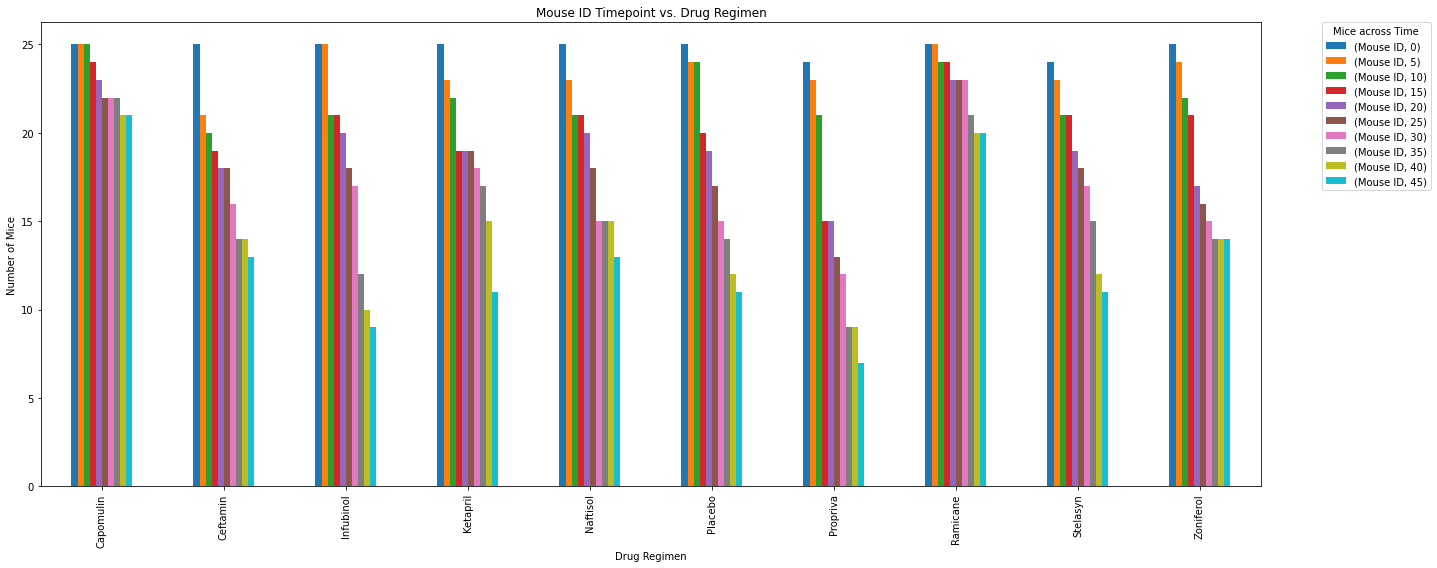

In [12]:
regimen_timepoint_df.unstack().plot(kind="bar", figsize=(20,8),
                                   title="Mouse ID Timepoint vs. Drug Regimen",
                                   xlabel="Drug Regimen",
                                   ylabel="Number of Mice")

plt.legend(loc="upper left", borderaxespad=0., bbox_to_anchor=(1.05,1), title="Mice across Time")

plt.show
plt.tight_layout()

In [20]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

timepoint_count_df = cleaned_study_df.loc[:,["Drug Regimen","Timepoint", "Mouse ID"]]
timepoint_count_df = timepoint_count_df.groupby(["Drug Regimen","Timepoint"]) 
timepoint_count_df = timepoint_count_df.count()

timepoint_count_df

Mouse ID
Drug Regimen Timepoint          
Capomulin    0                25
             5                25
             10               25
             15               24
             20               23
...                          ...
Zoniferol    25               16
             30               15
             35               14
             40               14
             45               14

[100 rows x 1 columns]

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Capomulin'),
  Text(1, 0, 'Ceftamin'),
  Text(2, 0, 'Infubinol'),
  Text(3, 0, 'Ketapril'),
  Text(4, 0, 'Naftisol'),
  Text(5, 0, 'Placebo'),
  Text(6, 0, 'Propriva'),
  Text(7, 0, 'Ramicane'),
  Text(8, 0, 'Stelasyn'),
  Text(9, 0, 'Zoniferol')])

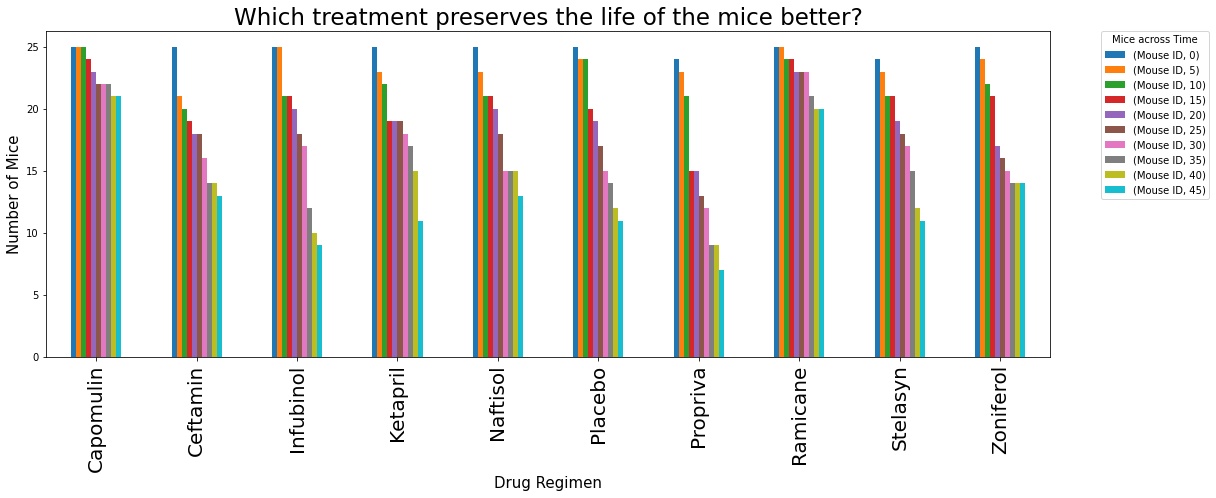

In [30]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

timepoint_count_df.unstack().plot(kind="bar", figsize = (18,6))
plt.title("Which treatment preserves the life of the mice better?", fontsize=23)
plt.legend(loc="upper left", borderaxespad=0., bbox_to_anchor=(1.05,1), title="Mice across Time")
plt.xlabel("Drug Regimen", fontsize=15)
plt.ylabel("Number of Mice", fontsize=15)
plt.xticks(fontsize = 20)

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
# Use DataFrame.plot() in order to create a bar chart of the data
mouse_sex = pd.DataFrame(cleaned_study_df['Sex'].value_counts())

mouse_sex

,Sex
Male,958
Female,922


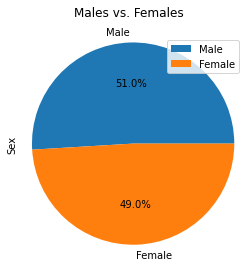

In [16]:
mouse_sex_pie = mouse_sex.plot(kind="pie", subplots=True, figsize=(4, 4), title=("Males vs. Females"), autopct='%1.1f%%')

plt.axis("equal")
plt.show()


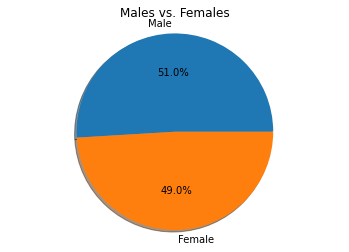

In [17]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Labels for the pie chart
labels = ["Male","Female"]

# The values of each section of the pie chart
sex = cleaned_study_df['Sex'].value_counts()

# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(sex, labels=labels, shadow=True, autopct="%1.1f%%")

# Set titles for the chart
plt.title("Males vs. Females")
plt.axis("equal")
plt.show()



## Quartiles, Outliers and Boxplots

In [31]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = cleaned_study_df.groupby("Mouse ID")
last_timepoint = last_timepoint["Timepoint"].max()
last_timepoint_df = pd.DataFrame(last_timepoint)

last_timepoint_df.head(10)




,Timepoint
Mouse ID,
a203,45
a251,45
a262,45
a275,45
a366,30
a401,45
a411,45
a444,45
a457,10


In [32]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
volume_df = pd.merge(last_timepoint_df, cleaned_study_df, on = ["Mouse ID","Timepoint"])
volume_df.head(10)


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
5,a401,45,Zoniferol,Female,8,25,66.794156,4
6,a411,45,Ramicane,Male,3,22,38.407618,1
7,a444,45,Ramicane,Female,10,25,43.047543,0
8,a457,10,Ketapril,Female,11,30,49.783419,0
9,a492,45,Stelasyn,Male,20,25,60.122011,1


In [34]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
volume_cap = []
volume_ram = []
volume_inf = []
volume_cef = []

for i in range(len(volume_df)-1):
    if volume_df.loc[i, "Drug Regimen"] == "Capomulin":
        volume_cap.append(volume_df.loc[i, "Tumor Volume (mm3)"])
    if volume_df.loc[i, "Drug Regimen"] == "Ramicane":
        volume_ram.append(volume_df.loc[i, "Tumor Volume (mm3)"])
    if volume_df.loc[i, "Drug Regimen"] == "Infubinol":
        volume_inf.append(volume_df.loc[i, "Tumor Volume (mm3)"])
    if volume_df.loc[i, "Drug Regimen"] == "Ceftamin":
        volume_cef.append(volume_df.loc[i, "Tumor Volume (mm3)"])

volume=[volume_cap, volume_ram, volume_inf, volume_cef]

volume



    

[[38.98287774,
  38.93963263,
  30.48598484,
  37.07402422,
  40.1592203,
  47.68596303,
  37.31184577,
  38.1251644,
  38.75326548,
  41.48300765,
  38.84687569,
  28.43096411,
  33.32909778,
  46.53920617,
  32.37735684,
  41.58152074,
  23.34359787,
  40.72857787,
  34.45529799,
  31.02392294,
  40.65812366,
  39.95234669,
  36.04104736,
  28.48403281,
  31.8962384],
 [38.4076183,
  43.0475426,
  38.81036633,
  32.97852192,
  38.34200823,
  33.39765251,
  37.31123552,
  40.65900627,
  29.12847181,
  33.56240217,
  36.37451039,
  31.56046955,
  36.13485243,
  22.05012627,
  30.56462509,
  31.09533505,
  45.22086888,
  36.56165229,
  37.22565033,
  43.41938077,
  30.27623175,
  40.66771292,
  43.16637266,
  44.18345092,
  30.63869575],
 [67.97341878,
  65.52574285,
  57.03186187,
  66.08306589,
  72.2267309,
  36.3213458,
  60.96971133,
  62.43540402,
  60.91876652,
  67.28962147,
  66.19691151,
  62.11727887,
  47.01036401,
  60.16518046,
  55.62942846,
  45.69933088,
  54.65654872,


In [40]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset 
    # Determine outliers using upper and lower bounds
    
outlier_list = []
for i in range(len(volume)):
    quartiles = pd.Series(volume[i]).quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    print(f"\n{treatments[i]}:")
    print(f"The lower quartile of tumor volume is: {lowerq}.")
    print(f"The upper quartile of tumor volume is: {upperq}.")
    print(f"The interquartile range of tumor volume is: {iqr}.")
    print(f"The median of tumor volume is: {quartiles[0.5]}.")
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")
    for j in range(len(volume[i])):
        if (volume[i][j] < lower_bound) or (volume[i][j] > upper_bound):
            outlier = volume[i][j]
            outlier_list.append(outlier)
            print(f"The outliers are {outlier_list}.")


Capomulin:
The lower quartile of tumor volume is: 32.37735684.
The upper quartile of tumor volume is: 40.1592203.
The interquartile range of tumor volume is: 7.781863460000004.
The median of tumor volume is: 38.1251644.
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.

Ramicane:
The lower quartile of tumor volume is: 31.56046955.
The upper quartile of tumor volume is: 40.65900627.
The interquartile range of tumor volume is: 9.098536719999998.
The median of tumor volume is: 36.56165229.
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.

Infubinol:
The lower quartile of tumor volume is: 54.04860769.
The upper quartile of tumor volume is: 65.52574285.
The interquartile range of tumor volume is: 11.477135160000003.
The median of tumor volume is: 60.16518046.
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.
The outliers are [36.3213458].

Ceftamin:
Th

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
